In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load data
data = pd.read_csv("data/abgeordnetenwatch_data_long.csv", sep=";")

In [6]:
# remove nas and duplicates
data = data.drop_duplicates(subset=["answer", "question_text"])
data = data.dropna(subset=["answer"])

In [7]:
# summarize topics to a smaller number
topics_mapped = {
    "Baden-Württemberg 2006 - 2011": "Wahlen",
    "Baden-Württemberg 2011 - 2016": "Wahlen",
    "Baden-Württemberg 2016 - 2021": "Wahlen",
    "Baden-Württemberg Wahl 2006": "Wahlen",
    "Baden-Württemberg Wahl 2011": "Wahlen",
    "Baden-Württemberg Wahl 2016": "Wahlen",
    "Baden-Württemberg Wahl 2021": "Wahlen",
    "Baden-Württemberg": "Wahlen",
    
    "Bayern": "Wahlen",
    "Bayern 2008 - 2013": "Wahlen",
    "Bayern 2013 - 2018": "Wahlen",
    "Bayern 2018 - 2023": "Wahlen",
    "Bayern Wahl 2008": "Wahlen",
    "Bayern Wahl 2013": "Wahlen",
    "Bayern Wahl 2018": "Wahlen",
    "Bayern Wahl 2023": "Wahlen",
    
    "Berlin": "Wahlen",
    "Berlin 2011 - 2016": "Wahlen",
    "Berlin 2016 - 2021": "Wahlen",
    "Berlin Wahl 2006": "Wahlen",
    "Berlin Wahl 2011": "Wahlen",
    "Berlin Wahl 2016": "Wahlen",
    "Berlin Wahl 2021": "Wahlen",
    "Berlin Wahl 2023": "Wahlen",
    
    "Brandenburg": "Wahlen",
    "Brandenburg 2014 - 2019": "Wahlen",
    "Brandenburg Wahl 2009": "Wahlen",
    "Brandenburg Wahl 2014": "Wahlen",
    "Brandenburg Wahl 2019": "Wahlen",
    
    "Bremen": "Wahlen",
    "Bremen 2015 - 2019": "Wahlen",
    "Bremen 2019 - 2023": "Wahlen",
    "Bremen Wahl 2007": "Wahlen",
    "Bremen Wahl 2011": "Wahlen",
    "Bremen Wahl 2015": "Wahlen",
    "Bremen Wahl 2019": "Wahlen",
    "Bremen Wahl 2023": "Wahlen",
    
    "Bundestag": "Wahlen",
    "Bundestag 2005 - 2009": "Wahlen",
    "Bundestag 2009 - 2013": "Wahlen",
    "Bundestag 2013 - 2017": "Wahlen",
    "Bundestag 2017 - 2021": "Wahlen",
    "Bundestag Wahl 2005": "Wahlen",
    "Bundestag Wahl 2009": "Wahlen",
    "Bundestag Wahl 2013": "Wahlen",
    "Bundestag Wahl 2017": "Wahlen",
    "Bundestag Wahl 2021": "Wahlen",
    
    "EU-Parlament": "Wahlen",
    "EU-Parlament 2004 - 2009": "Wahlen",
    "EU-Parlament 2009 - 2014": "Wahlen",
    "EU-Parlament 2014 - 2019": "Wahlen",
    "EU-Parlament 2019 - 2024": "Wahlen",
    "EU-Parlament Wahl 2004": "Wahlen",
    "EU-Parlament Wahl 2009": "Wahlen",
    "EU-Parlament Wahl 2014": "Wahlen",
    "EU-Parlament Wahl 2019": "Wahlen",
    "EU-Parlament Wahl 2024": "Wahlen",
    
    "Hamburg": "Wahlen",
    "Hamburg 2004 - 2008": "Wahlen",
    "Hamburg 2008 - 2011": "Wahlen",
    "Hamburg 2011 - 2015": "Wahlen",
    "Hamburg 2015 - 2020": "Wahlen",
    "Hamburg Wahl 2004": "Wahlen",
    "Hamburg Wahl 2008": "Wahlen",
    "Hamburg Wahl 2011": "Wahlen",
    "Hamburg Wahl 2015": "Wahlen",
    "Hamburg Wahl 2020": "Wahlen",
    
    "Hessen": "Wahlen",
    "Hessen 2018 - 2024": "Wahlen",
    "Hessen Wahl 2018": "Wahlen",
    "Hessen Wahl 2023": "Wahlen",
    
    "Mecklenburg-Vorpommern": "Wahlen",
    "Mecklenburg-Vorpommern 2016 - 2021": "Wahlen",
    "Mecklenburg-Vorpommern Wahl 2006": "Wahlen",
    "Mecklenburg-Vorpommern Wahl 2011": "Wahlen",
    "Mecklenburg-Vorpommern Wahl 2016": "Wahlen",
    "Mecklenburg-Vorpommern Wahl 2021": "Wahlen",
    
    "Niedersachsen": "Wahlen",
    "Niedersachsen 2008 - 2013": "Wahlen",
    "Niedersachsen 2013 - 2017": "Wahlen",
    "Niedersachsen 2017 - 2022": "Wahlen",
    "Niedersachsen Wahl 2008": "Wahlen",
    "Niedersachsen Wahl 2013": "Wahlen",
    "Niedersachsen Wahl 2017": "Wahlen",
    "Niedersachsen Wahl 2022": "Wahlen",
    
    "Nordrhein-Westfalen": "Wahlen",
    "Nordrhein-Westfalen 2010 - 2012": "Wahlen",
    "Nordrhein-Westfalen 2012 - 2017": "Wahlen",
    "Nordrhein-Westfalen 2017 - 2022": "Wahlen",
    "Nordrhein-Westfalen Wahl 2010": "Wahlen",
    "Nordrhein-Westfalen Wahl 2012": "Wahlen",
    "Nordrhein-Westfalen Wahl 2017": "Wahlen",
    "Nordrhein-Westfalen Wahl 2022": "Wahlen",
    
    "Rheinland-Pfalz": "Wahlen",
    "Rheinland-Pfalz 2011 - 2016": "Wahlen",
    "Rheinland-Pfalz 2016 - 2021": "Wahlen",
    "Rheinland-Pfalz Wahl 2006": "Wahlen",
    "Rheinland-Pfalz Wahl 2011": "Wahlen",
    "Rheinland-Pfalz Wahl 2016": "Wahlen",
    "Rheinland-Pfalz Wahl 2021": "Wahlen",
    
    "Saarland": "Wahlen",
    "Saarland 2017 - 2022": "Wahlen",
    "Saarland Wahl 2009": "Wahlen",
    "Saarland Wahl 2012": "Wahlen",
    
    "Sachsen": "Wahlen",
    "Sachsen 2009 - 2014": "Wahlen",
    "Sachsen 2014 - 2019": "Wahlen",
    "Sachsen 2019 - 2024": "Wahlen",
    "Sachsen Wahl 2009": "Wahlen",
    "Sachsen Wahl 2014": "Wahlen",
    "Sachsen Wahl 2019": "Wahlen",
    
    "Sachsen-Anhalt": "Wahlen",
    "Sachsen-Anhalt 2016 - 2021": "Wahlen",
    "Sachsen-Anhalt Wahl 2011": "Wahlen",
    "Sachsen-Anhalt Wahl 2006": "Wahlen",
    "Sachsen-Anhalt Wahl 2021": "Wahlen",
    
    "Schleswig-Holstein": "Wahlen",
    "Schleswig-Holstein 2009 - 2012": "Wahlen",
    "Schleswig-Holstein 2012 - 2017": "Wahlen",
    "Schleswig-Holstein 2017 - 2022": "Wahlen",
    "Schleswig-Holstein Wahl 2009": "Wahlen",
    "Schleswig-Holstein Wahl 2012": "Wahlen",
    "Schleswig-Holstein Wahl 2017": "Wahlen",
    "Schleswig-Holstein Wahl 2022": "Wahlen",
    
    "Thüringen": "Wahlen",
    "Thüringen 2014 - 2019": "Wahlen",
    "Thüringen 2019 - 2024": "Wahlen",
    "Thüringen Wahl 2009": "Wahlen",
    "Thüringen Wahl 2014": "Wahlen",
    "Thüringen Wahl 2019": "Wahlen",
    
    "Außenpolitik und internationale Beziehungen": "Außenpolitische Themen",
    "Außenwirtschaft": "Außenpolitische Themen",
    "Entwicklungspolitik": "Außenpolitische Themen",
    "Europapolitik und Europäische Union": "Außenpolitische Themen",
    "Humanitäre Hilfe": "Außenpolitische Themen",
    
    "Deutsche Einheit / Innerdeutsche Beziehungen (bis 1990)": "Inneres und Sicherheit",
    "Innere Angelegenheiten": "Inneres und Sicherheit",
    "Innere Sicherheit": "Inneres und Sicherheit",
    "Recht": "Inneres und Sicherheit",
    "Raumordnung, Bau- und Wohnungswesen": "Inneres und Sicherheit",
    "Staat und Verwaltung": "Inneres und Sicherheit",
    "Verteidigung": "Inneres und Sicherheit",
    
    "Digitale Agenda": "Digitales",
    "Inneres und Sicherheit": "Digitales",
    "Technologiefolgenabschätzung": "Digitales",
    "Wissenschaft, Forschung und Technologie": "Digitales",
    "Medien": "Digitales",
    "digitale Infrastruktur": "Digitales",
    "Medien, Kommunikation und Informationstechnik": "Digitales",
    
    "Bildung und Erziehung": "Bildung und Forschung",
    "Forschung": "Bildung und Forschung",
    
    "Umwelt": "Energie und Umwelt",
    "Energie": "Energie und Umwelt",
    "Reaktorsicherheit": "Energie und Umwelt",
    "Klima": "Energie und Umwelt",
    "Naturschutz": "Energie und Umwelt",
    "Verkehr": "Energie und Umwelt",
    
    "Finanzen": "Finanzen und Wirtschaft",
    "Öffentliche Finanzen, Steuern und Abgaben": "Finanzen und Wirtschaft",
    "Haushalt": "Finanzen und Wirtschaft",
    "Wirtschaft": "Finanzen und Wirtschaft",
    
    "Immunität": "Politik und Parteien",
    "Politisches Leben, Parteien": "Politik und Parteien",
    "Lobbyismus & Transparenz": "Politik und Parteien",
    "Geschäftsordnung": "Politik und Parteien",
    "Petitionen": "Politik und Parteien",
    "Gesellschaftspolitik, soziale Gruppen": "Politik und Parteien",
    
    "Gesundheit": "Gesundheit und Ernährung",
    "Landwirtschaft und Ernährung": "Gesundheit und Ernährung",
    "Verbraucherschutz": "Gesundheit und Ernährung",
    
    "Soziale Sicherung": "Arbeit und Beschäftigung",
    "Arbeit und Beschäftigung": "Arbeit und Beschäftigung",
    
    "Sport": "Sport, Kultur und Tourismus",
    "Sport, Freizeit und Tourismus": "Sport, Kultur und Tourismus",
    "Kultur": "Sport, Kultur und Tourismus",
    "Tourismus": "Sport, Kultur und Tourismus",
    
    "Wahlen": "Wahlen",
    "Wahlprüfung": "Wahlen",
    
    "Familie": "Frauen, Jugend, Familie",
    "Frauen": "Frauen, Jugend, Familie",
    "Senioren": "Frauen, Jugend, Familie",
    "Jugend": "Frauen, Jugend, Familie",
    
    "Migration und Aufenthaltsrecht": "Migration und Aufenthaltsrecht",
    "Menschenrechte": "Migration und Aufenthaltsrecht"
}

data["mapped_topic"] = data["topic"].map(topics_mapped)

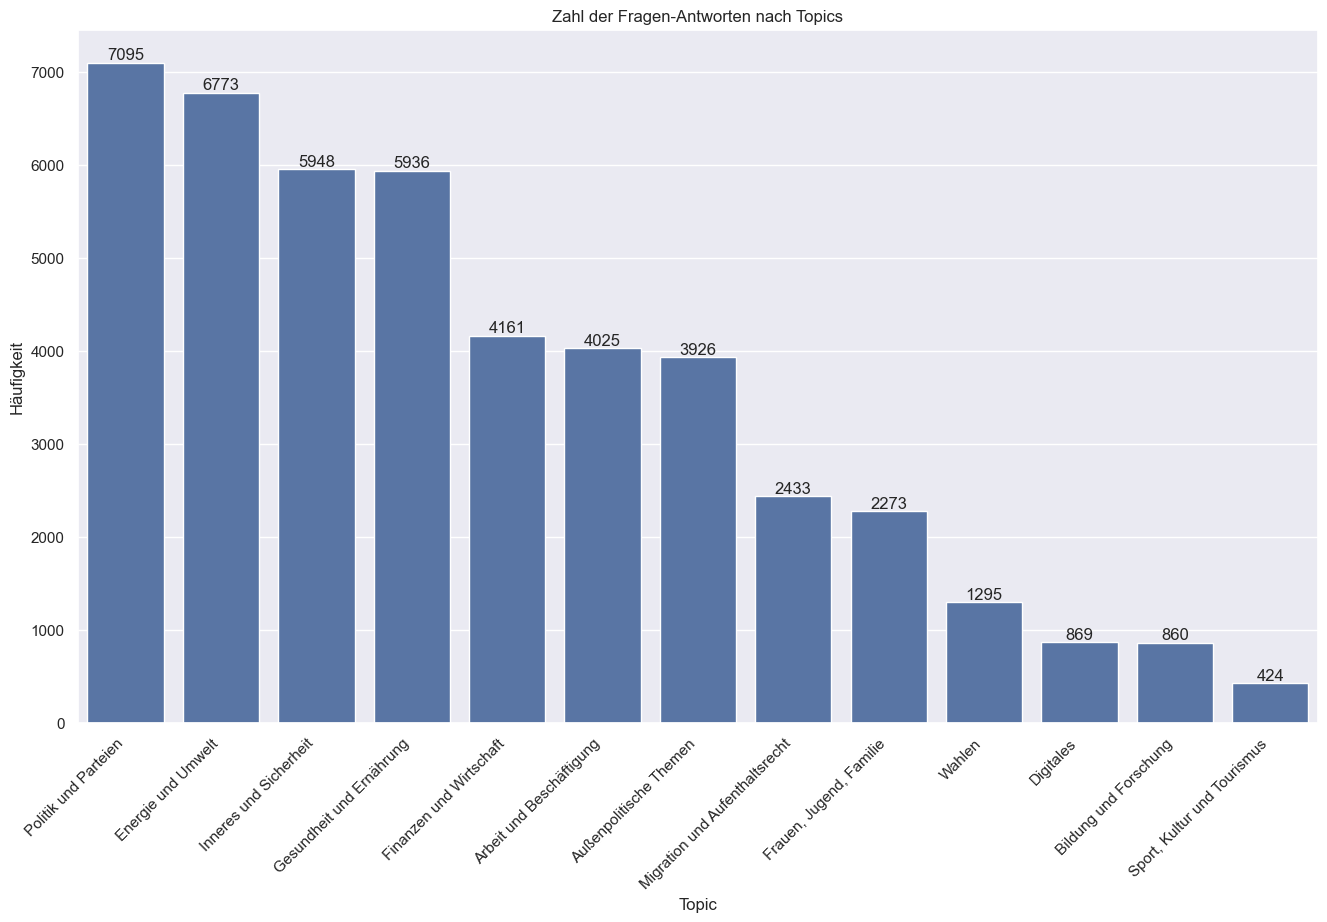

In [8]:
# display topics and number of answers in barchart
sns.set_theme()
plt.figure(figsize=(16,9))

ax = sns.countplot(
    data=data,
    x="mapped_topic",
    order=data["mapped_topic"].value_counts().index
)

# show values over bars
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Topic")
plt.ylabel("Häufigkeit")
plt.title("Zahl der Fragen-Antworten nach Topics")

plt.xticks(rotation=45, ha="right")
plt.show()

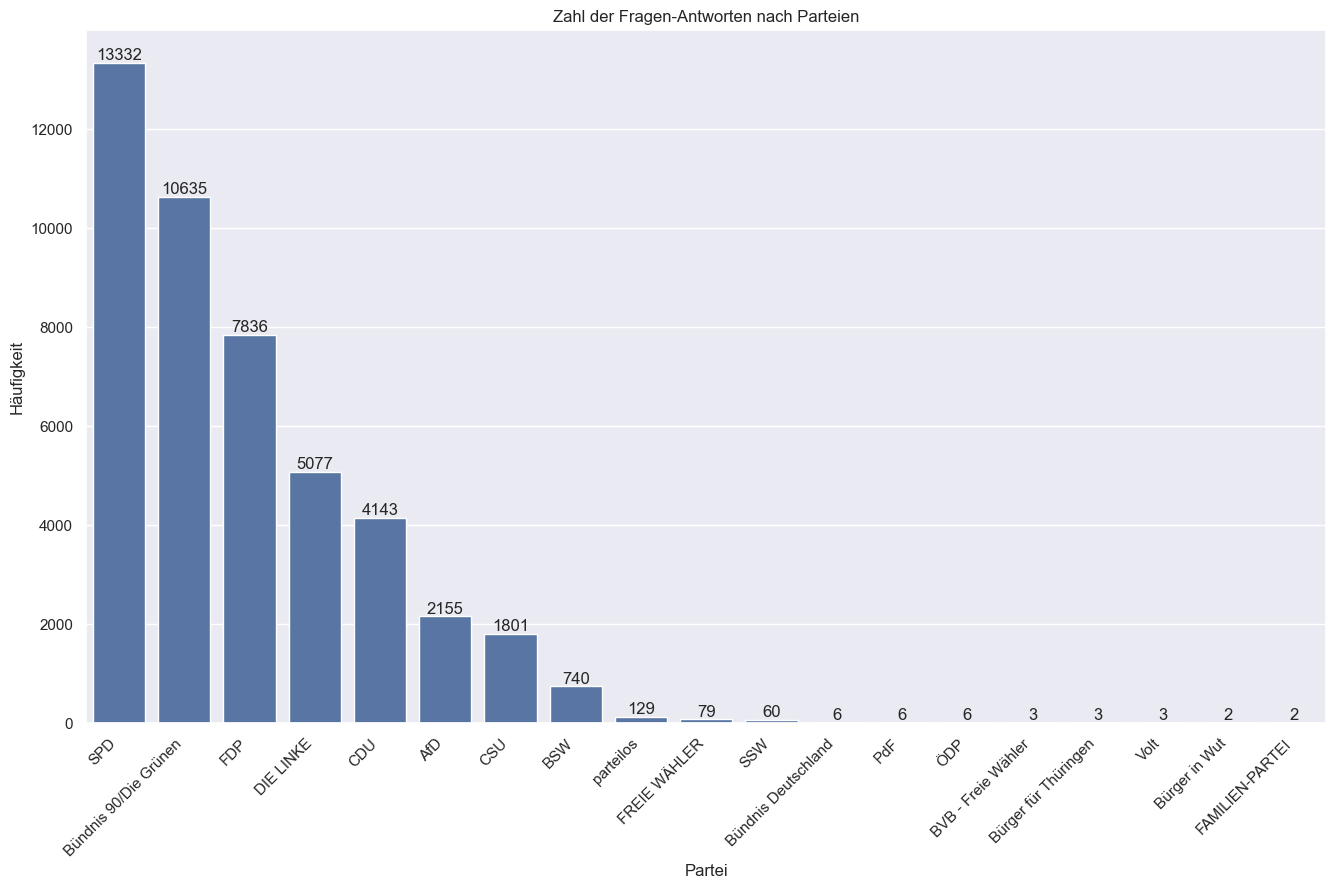

In [9]:
# display parties and number of answers in barchart
sns.set_theme()
plt.figure(figsize=(16,9))

ax = sns.countplot(
    data=data,
    x="party",
    order=data["party"].value_counts().index
)

# show values over bars
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Partei")
plt.ylabel("Häufigkeit")
plt.title("Zahl der Fragen-Antworten nach Parteien")

plt.xticks(rotation=45, ha="right")
plt.show()

In [10]:
# summarize parliaments
parliaments_mapped = {
    "Baden-Württemberg 2006 - 2011": "Baden-Württemberg",
    "Baden-Württemberg 2011 - 2016": "Baden-Württemberg",
    "Baden-Württemberg 2016 - 2021": "Baden-Württemberg",
    "Baden-Württemberg Wahl 2006": "Baden-Württemberg",
    "Baden-Württemberg Wahl 2011": "Baden-Württemberg",
    "Baden-Württemberg Wahl 2016": "Baden-Württemberg",
    "Baden-Württemberg Wahl 2021": "Baden-Württemberg",
    "Baden-Württemberg": "Baden-Württemberg",
    
    "Bayern": "Bayern",
    "Bayern 2008 - 2013": "Bayern",
    "Bayern 2013 - 2018": "Bayern",
    "Bayern 2018 - 2023": "Bayern",
    "Bayern Wahl 2008": "Bayern",
    "Bayern Wahl 2013": "Bayern",
    "Bayern Wahl 2018": "Bayern",
    "Bayern Wahl 2023": "Bayern",
    
    "Berlin": "Berlin",
    "Berlin 2011 - 2016": "Berlin",
    "Berlin 2016 - 2021": "Berlin",
    "Berlin Wahl 2006": "Berlin",
    "Berlin Wahl 2011": "Berlin",
    "Berlin Wahl 2016": "Berlin",
    "Berlin Wahl 2021": "Berlin",
    "Berlin Wahl 2023": "Berlin",
    
    "Brandenburg": "Brandenburg",
    "Brandenburg 2014 - 2019": "Brandenburg",
    "Brandenburg Wahl 2009": "Brandenburg",
    "Brandenburg Wahl 2014": "Brandenburg",
    "Brandenburg Wahl 2019": "Brandenburg",
    
    "Bremen": "Bremen",
    "Bremen 2015 - 2019": "Bremen",
    "Bremen 2019 - 2023": "Bremen",
    "Bremen Wahl 2007": "Bremen",
    "Bremen Wahl 2011": "Bremen",
    "Bremen Wahl 2015": "Bremen",
    "Bremen Wahl 2019": "Bremen",
    "Bremen Wahl 2023": "Bremen",
    
    "Bundestag": "Bundestag",
    "Bundestag 2005 - 2009": "Bundestag",
    "Bundestag 2009 - 2013": "Bundestag",
    "Bundestag 2013 - 2017": "Bundestag",
    "Bundestag 2017 - 2021": "Bundestag",
    "Bundestag Wahl 2005": "Bundestag",
    "Bundestag Wahl 2009": "Bundestag",
    "Bundestag Wahl 2013": "Bundestag",
    "Bundestag Wahl 2017": "Bundestag",
    "Bundestag Wahl 2021": "Bundestag",
    
    "EU-Parlament": "EU-Parlament",
    "EU-Parlament 2004 - 2009": "EU-Parlament",
    "EU-Parlament 2009 - 2014": "EU-Parlament",
    "EU-Parlament 2014 - 2019": "EU-Parlament",
    "EU-Parlament 2019 - 2024": "EU-Parlament",
    "EU-Parlament Wahl 2004": "EU-Parlament",
    "EU-Parlament Wahl 2009": "EU-Parlament",
    "EU-Parlament Wahl 2014": "EU-Parlament",
    "EU-Parlament Wahl 2019": "EU-Parlament",
    "EU-Parlament Wahl 2024": "EU-Parlament",
    
    "Hamburg": "Hamburg",
    "Hamburg 2004 - 2008": "Hamburg",
    "Hamburg 2008 - 2011": "Hamburg",
    "Hamburg 2011 - 2015": "Hamburg",
    "Hamburg 2015 - 2020": "Hamburg",
    "Hamburg Wahl 2004": "Hamburg",
    "Hamburg Wahl 2008": "Hamburg",
    "Hamburg Wahl 2011": "Hamburg",
    "Hamburg Wahl 2015": "Hamburg",
    "Hamburg Wahl 2020": "Hamburg",
    
    "Hessen": "Hessen",
    "Hessen 2018 - 2024": "Hessen",
    "Hessen Wahl 2018": "Hessen",
    "Hessen Wahl 2023": "Hessen",
    
    "Mecklenburg-Vorpommern": "Mecklenburg-Vorpommern",
    "Mecklenburg-Vorpommern 2016 - 2021": "Mecklenburg-Vorpommern",
    "Mecklenburg-Vorpommern Wahl 2006": "Mecklenburg-Vorpommern",
    "Mecklenburg-Vorpommern Wahl 2011": "Mecklenburg-Vorpommern",
    "Mecklenburg-Vorpommern Wahl 2016": "Mecklenburg-Vorpommern",
    "Mecklenburg-Vorpommern Wahl 2021": "Mecklenburg-Vorpommern",
    
    "Niedersachsen": "Niedersachsen",
    "Niedersachsen 2008 - 2013": "Niedersachsen",
    "Niedersachsen 2013 - 2017": "Niedersachsen",
    "Niedersachsen 2017 - 2022": "Niedersachsen",
    "Niedersachsen Wahl 2008": "Niedersachsen",
    "Niedersachsen Wahl 2013": "Niedersachsen",
    "Niedersachsen Wahl 2017": "Niedersachsen",
    "Niedersachsen Wahl 2022": "Niedersachsen",
    
    "Nordrhein-Westfalen": "Nordrhein-Westfalen",
    "Nordrhein-Westfalen 2010 - 2012": "Nordrhein-Westfalen",
    "Nordrhein-Westfalen 2012 - 2017": "Nordrhein-Westfalen",
    "Nordrhein-Westfalen 2017 - 2022": "Nordrhein-Westfalen",
    "Nordrhein-Westfalen Wahl 2010": "Nordrhein-Westfalen",
    "Nordrhein-Westfalen Wahl 2012": "Nordrhein-Westfalen",
    "Nordrhein-Westfalen Wahl 2017": "Nordrhein-Westfalen",
    "Nordrhein-Westfalen Wahl 2022": "Nordrhein-Westfalen",
    
    "Rheinland-Pfalz": "Rheinland-Pfalz",
    "Rheinland-Pfalz 2011 - 2016": "Rheinland-Pfalz",
    "Rheinland-Pfalz 2016 - 2021": "Rheinland-Pfalz",
    "Rheinland-Pfalz Wahl 2006": "Rheinland-Pfalz",
    "Rheinland-Pfalz Wahl 2011": "Rheinland-Pfalz",
    "Rheinland-Pfalz Wahl 2016": "Rheinland-Pfalz",
    "Rheinland-Pfalz Wahl 2021": "Rheinland-Pfalz",
    
    "Saarland": "Saarland",
    "Saarland 2017 - 2022": "Saarland",
    "Saarland Wahl 2009": "Saarland",
    "Saarland Wahl 2012": "Saarland",
    
    "Sachsen": "Sachsen",
    "Sachsen 2009 - 2014": "Sachsen",
    "Sachsen 2014 - 2019": "Sachsen",
    "Sachsen 2019 - 2024": "Sachsen",
    "Sachsen Wahl 2009": "Sachsen",
    "Sachsen Wahl 2014": "Sachsen",
    "Sachsen Wahl 2019": "Sachsen",
    
    "Sachsen-Anhalt": "Sachsen-Anhalt",
    "Sachsen-Anhalt 2016 - 2021": "Sachsen-Anhalt",
    "Sachsen-Anhalt Wahl 2011": "Sachsen-Anhalt",
    "Sachsen-Anhalt Wahl 2006": "Sachsen-Anhalt",
    "Sachsen-Anhalt Wahl 2021": "Sachsen-Anhalt",
    
    "Schleswig-Holstein": "Schleswig-Holstein",
    "Schleswig-Holstein 2009 - 2012": "Schleswig-Holstein",
    "Schleswig-Holstein 2012 - 2017": "Schleswig-Holstein",
    "Schleswig-Holstein 2017 - 2022": "Schleswig-Holstein",
    "Schleswig-Holstein Wahl 2009": "Schleswig-Holstein",
    "Schleswig-Holstein Wahl 2012": "Schleswig-Holstein",
    "Schleswig-Holstein Wahl 2017": "Schleswig-Holstein",
    "Schleswig-Holstein Wahl 2022": "Schleswig-Holstein",
    
    "Thüringen": "Thüringen",
    "Thüringen 2014 - 2019": "Thüringen",
    "Thüringen 2019 - 2024": "Thüringen",
    "Thüringen Wahl 2009": "Thüringen",
    "Thüringen Wahl 2014": "Thüringen",
    "Thüringen Wahl 2019": "Thüringen"
}

data["mapped_parliament"] = data["parliament"].map(parliaments_mapped)

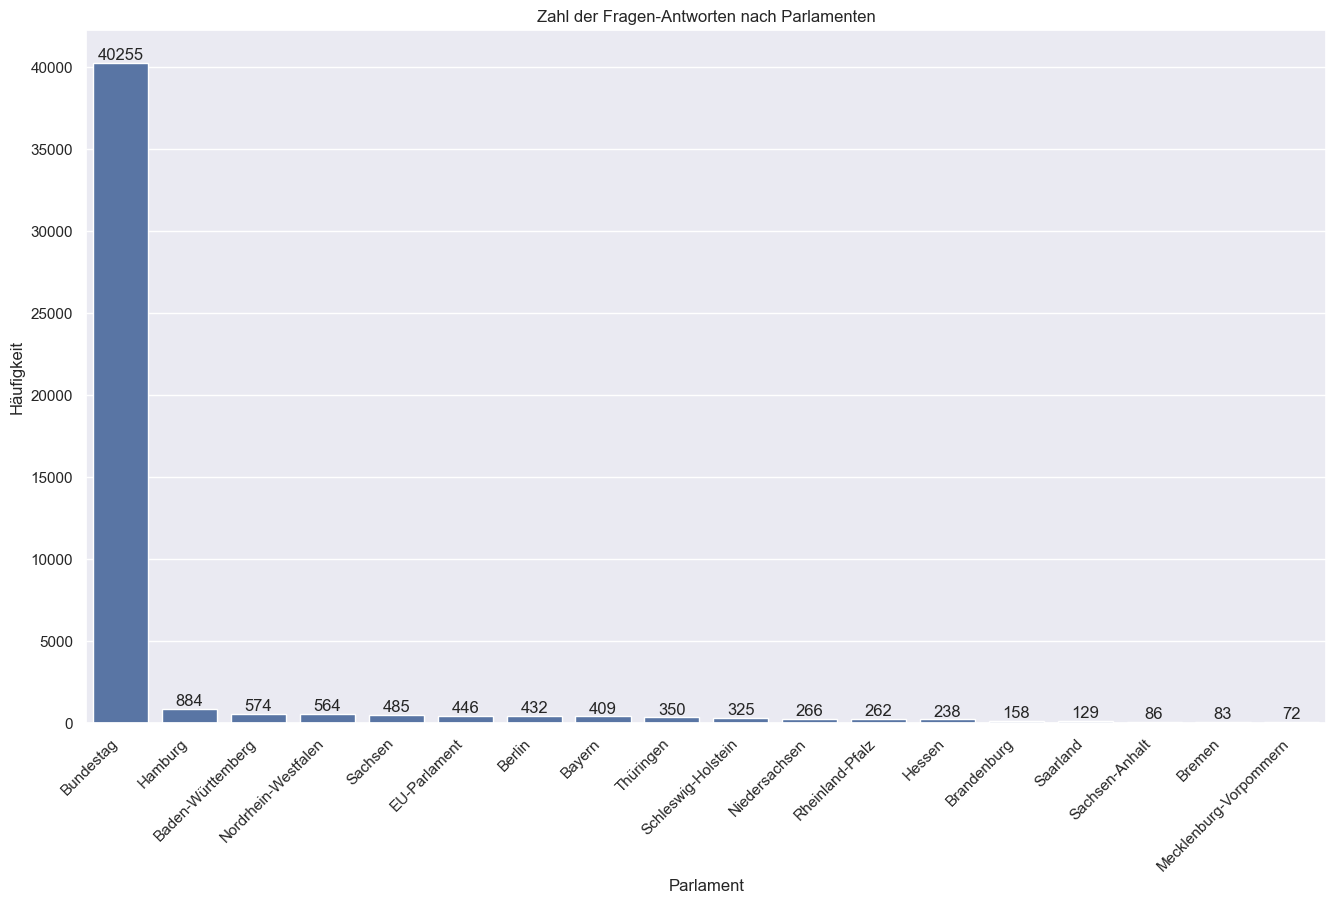

In [11]:
# display parliament and number of answers in barchart
sns.set_theme()
plt.figure(figsize=(16,9))

ax = sns.countplot(
    data=data,
    x="mapped_parliament",
    order=data["mapped_parliament"].value_counts().index
)

# show values over bars
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Parlament")
plt.ylabel("Häufigkeit")
plt.title("Zahl der Fragen-Antworten nach Parlamenten")

plt.xticks(rotation=45, ha="right")
plt.show()

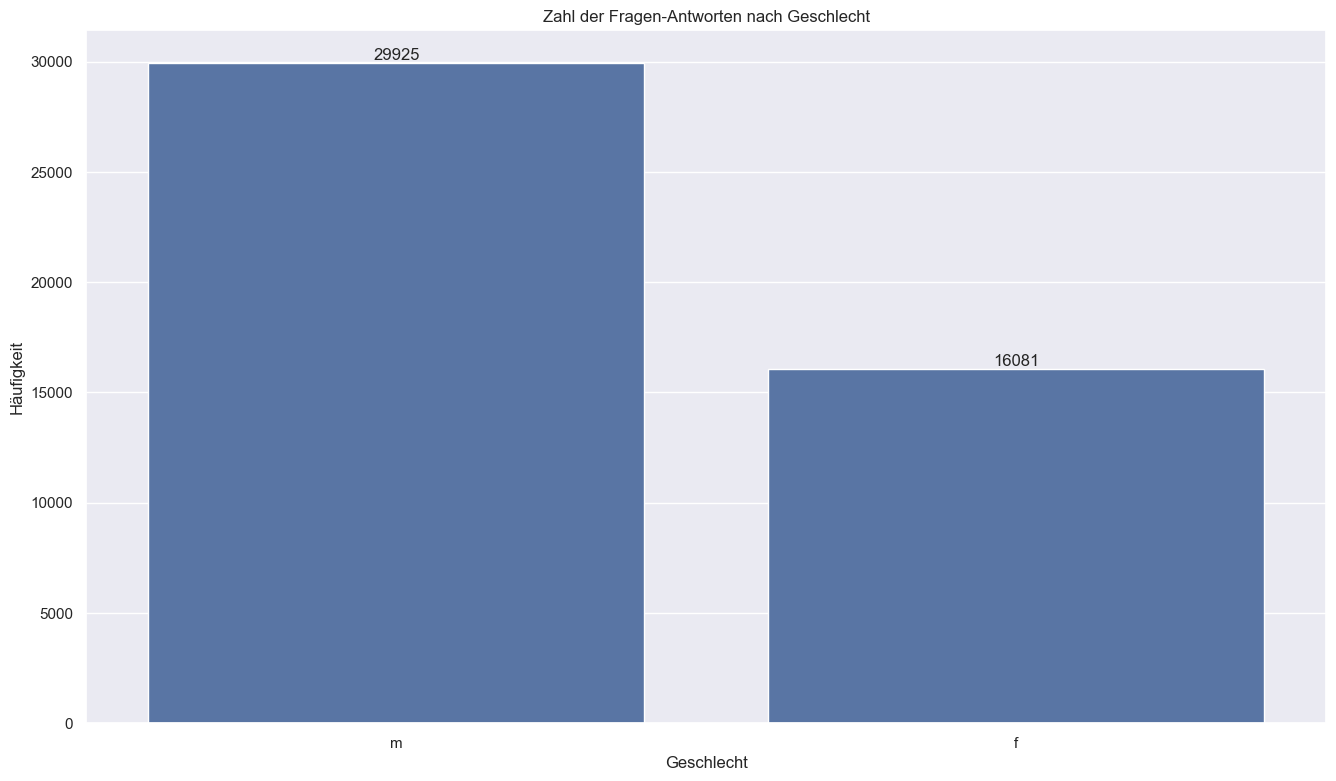

In [12]:
# display gender and number of answers in barchart
sns.set_theme()
plt.figure(figsize=(16,9))

ax = sns.countplot(
    data=data,
    x="gender",
    order=data["gender"].value_counts().index
)

# show values over bars
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Geschlecht")
plt.ylabel("Häufigkeit")
plt.title("Zahl der Fragen-Antworten nach Geschlecht")

plt.show()

In [13]:
sample  = pd.read_csv("data/labeled_unprocessed_sample_data.csv", sep=";")

In [14]:
sample.head()

,answer,answer_encoded
0,"Sehr geehrte Frau M.,haben Sie vielen Dank für...",answer
1,Sehr geehrter Herr K.haben Sie vielen Dank für...,answer
2,"Sehr geehrte Frau E.,haben Sie vielen Dank für...",answer
3,"Sehr geehrte Frau L.,haben Sie vielen Dank für...",evasive answer
4,Sehr geehrter Herr F.haben Sie vielen Dank für...,answer


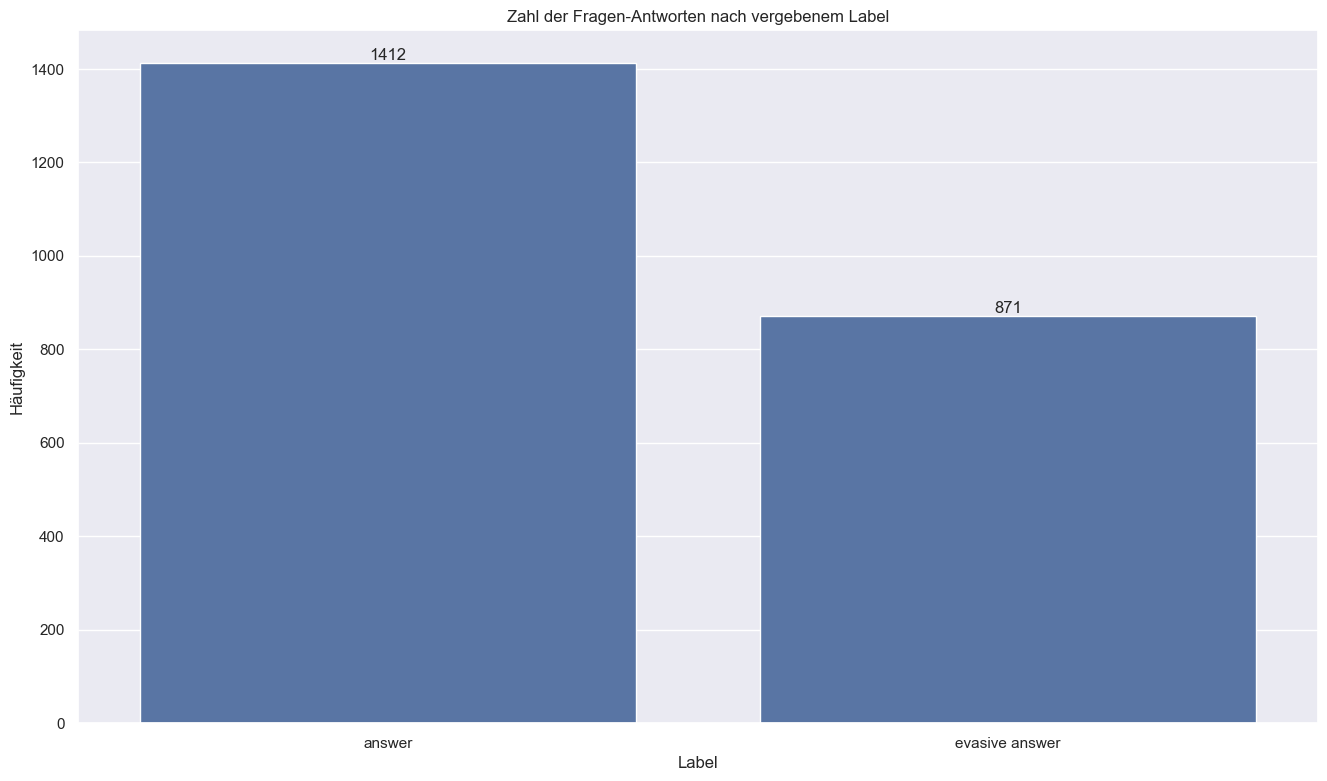

In [15]:
# display label and number of answers in barchart
sns.set_theme()
plt.figure(figsize=(16,9))

ax = sns.countplot(
    data=sample,
    x="answer_encoded",
)

# show values over bars
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Label")
plt.ylabel("Häufigkeit")
plt.title("Zahl der Fragen-Antworten nach vergebenem Label")

plt.show()

(0.0, 1.0)

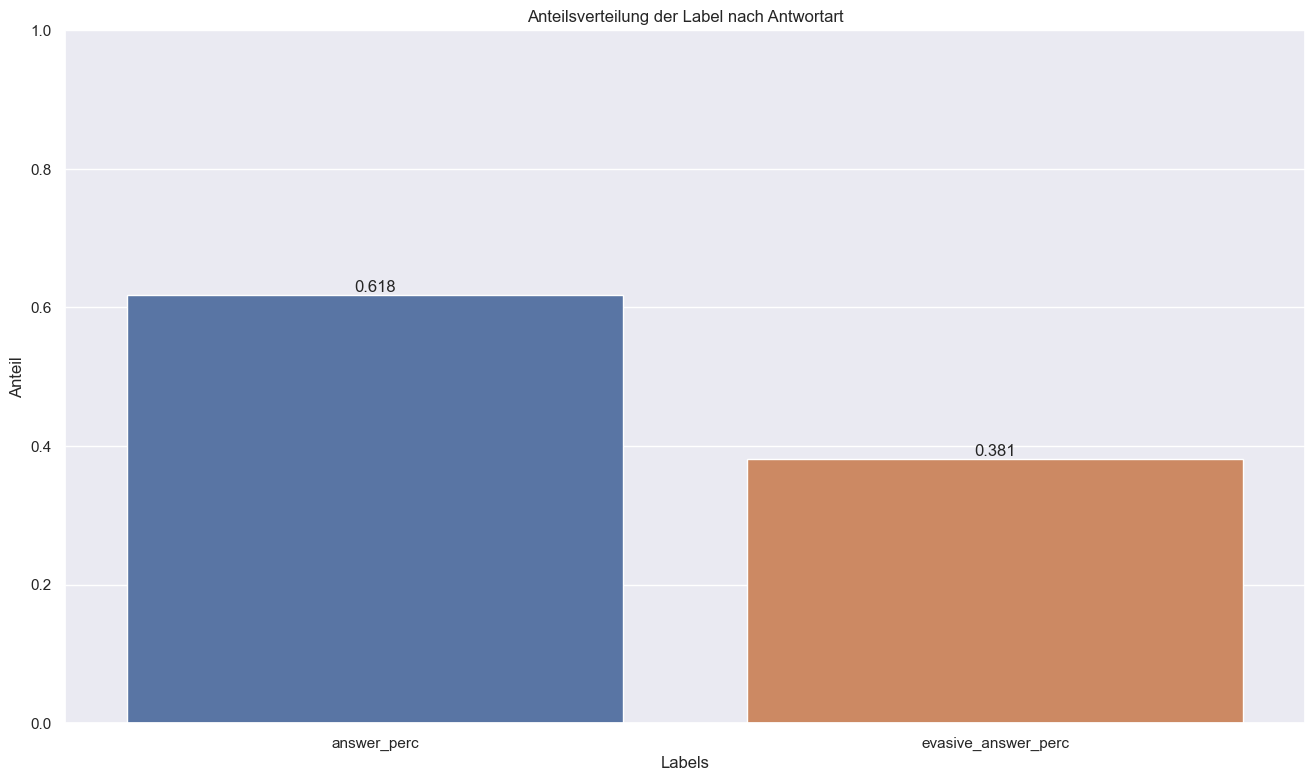

In [21]:
df_data_perc = pd.DataFrame({"total" : [sample["answer"].count()]})
df_data_perc["answer"] = len(sample[sample["answer_encoded"] == "answer"])
df_data_perc["evasive_answer"] = len(sample[sample["answer_encoded"] == "evasive answer"])
df_data_perc["total_perc"] = 1
df_data_perc["answer_perc"] = df_data_perc["answer"]/df_data_perc["total"]
df_data_perc["evasive_answer_perc"] = df_data_perc["evasive_answer"]/df_data_perc["total"]


sns.set_theme()
plt.figure(figsize=(16,9))
ax = sns.barplot(
    data=df_data_perc[["answer_perc", "evasive_answer_perc"]].round(decimals=3)
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Labels")
plt.ylabel("Anteil")
plt.title("Anteilsverteilung der Label nach Antwortart")

plt.ylim(0,1)